<a href="https://colab.research.google.com/github/ozguevara/cbutp/blob/main/Scitiky_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [ ]:
X = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)


In [ ]:
#ahora vamos a separar una parte para test y otra para el entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

print(len(X))
print(len(X_train))
print(len(X_test))

2221
1332
889


In [ ]:
X.head(2)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predicted = model.predict(X_test)
predicted.shape


(889,)

(array([[708., 132.,  39.,   7.,   2.,   1.,   0.,   0.,   0.,   0.],
        [718., 120.,  31.,  13.,   5.,   0.,   1.,   0.,   0.,   1.]]),
 array([-1.06201991e+08,  1.82810107e+08,  4.71822204e+08,  7.60834301e+08,
         1.04984640e+09,  1.33885850e+09,  1.62787059e+09,  1.91688269e+09,
         2.20589479e+09,  2.49490688e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

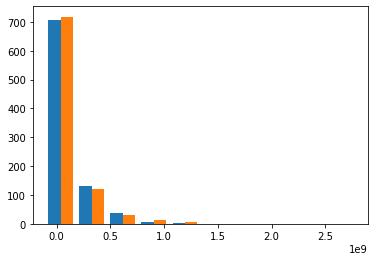

In [ ]:
plt.hist([predicted, y_test])

In [ ]:
# Da un 0.773 es muy buen aportación

model.score(X_test, y_test)

0.7730377017832515

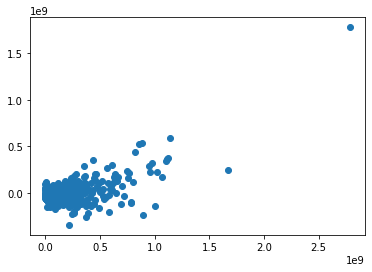

In [ ]:
residuals = y_test - predicted
plt.scatter(y_test, residuals)

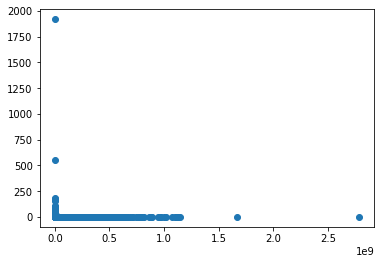

In [ ]:
#errores en porcentaje para evaluar mejor
ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test,ap_residuals)

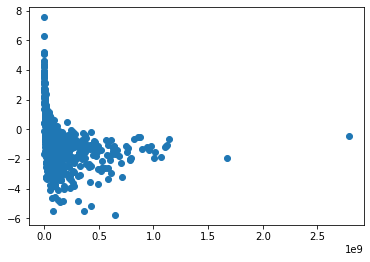

In [ ]:
#vamos a verlo en algoritmo para verlo en orden de magnitud
lap_residuals =  np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)

In [ ]:
#Diseño features es incluso mas importante que la optimización